In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/anomaly-detection':
  os.chdir(r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/anomaly-detection')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_2232868/443602219.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/zipimport.py": 1708118050.3201988, "/home/hasan/miniconda3/lib/python3.12/codecs.py": 1708118050.0762022, "/home/hasan/miniconda3/lib/python3.12/encodings/aliases.py": 1708118050.5121963, "/home/hasan/miniconda3/lib/python3.12/encodings/__init__.py": 1708118050.6041949, "/home/hasan/miniconda3/lib/python3.12/encodings/utf_8.py": 1708118050.7081935, "/home/hasan/miniconda3/lib/python3.12/abc.py": 1708118050.0562024, "/home/hasan/miniconda3/lib/python3.12/io.py": 1708118050.1442013, "/home/hasan/miniconda3/lib/python3.12/stat.py": 1708118050.2561998, "/home/hasan/miniconda3/lib/python3.12/_collections_abc.py": 1708118050.084202, "/home/hasan/miniconda3/lib/python3.12/genericpath.py": 1708118050.1242015, "/home/hasan/miniconda3/lib/python3.12/posixpath.py": 1708118050.19220

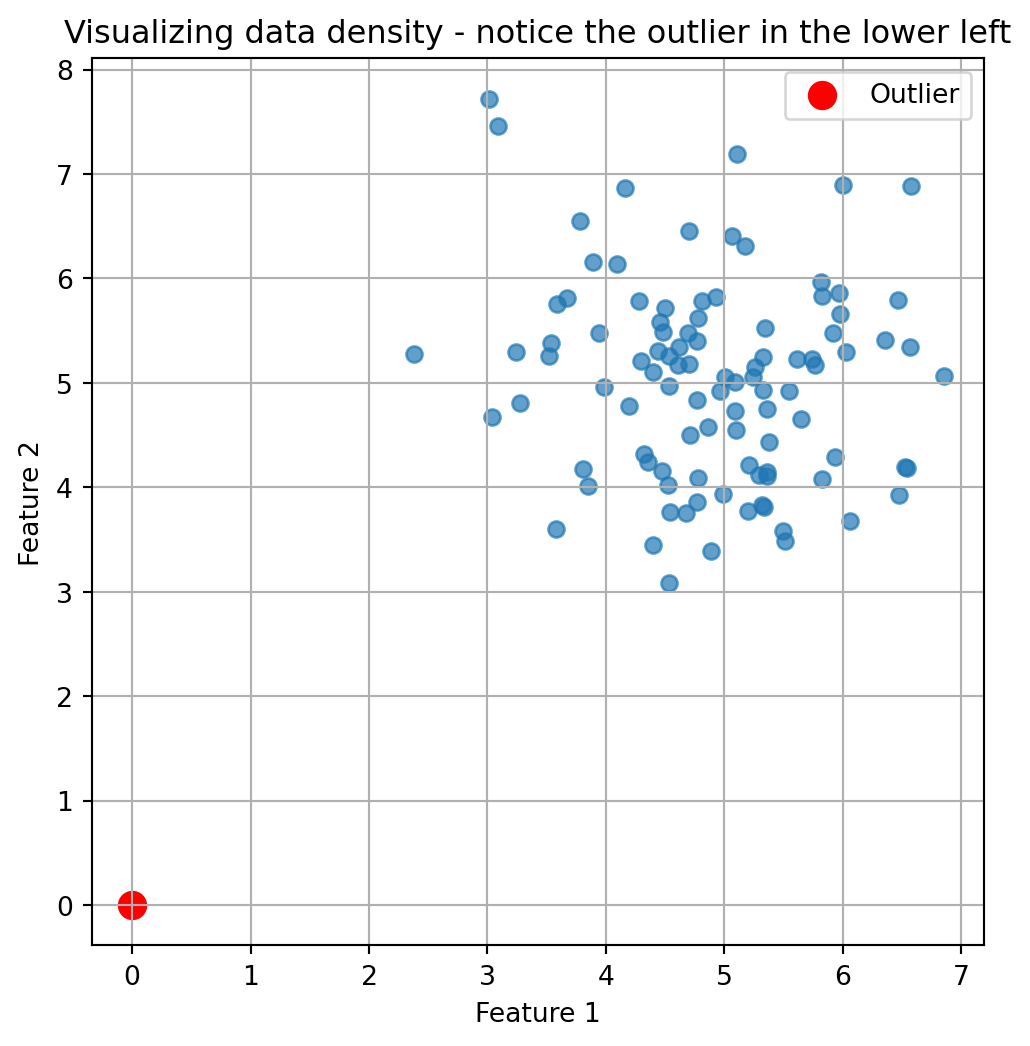

In [2]:
#| label: fig-density-example
#| fig-cap: Visualizing data density - notice the outlier in the lower left
#| echo: false

# Python placeholder for density plot
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# Simulate clustered data with one outlier
x = np.concatenate([np.random.normal(5, 1, 100), [0]])
y = np.concatenate([np.random.normal(5, 1, 100), [0]])

plt.figure(figsize=(6, 6))
plt.scatter(x, y, alpha=0.7)
plt.scatter([0], [0], color='red', s=100, label='Outlier')
plt.title('Visualizing data density - notice the outlier in the lower left')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
#| label: fig-kde-visualization
#| fig-cap: Different kernel functions visualized
#| echo: false

# Placeholder for Python code to visualize different kernel functions

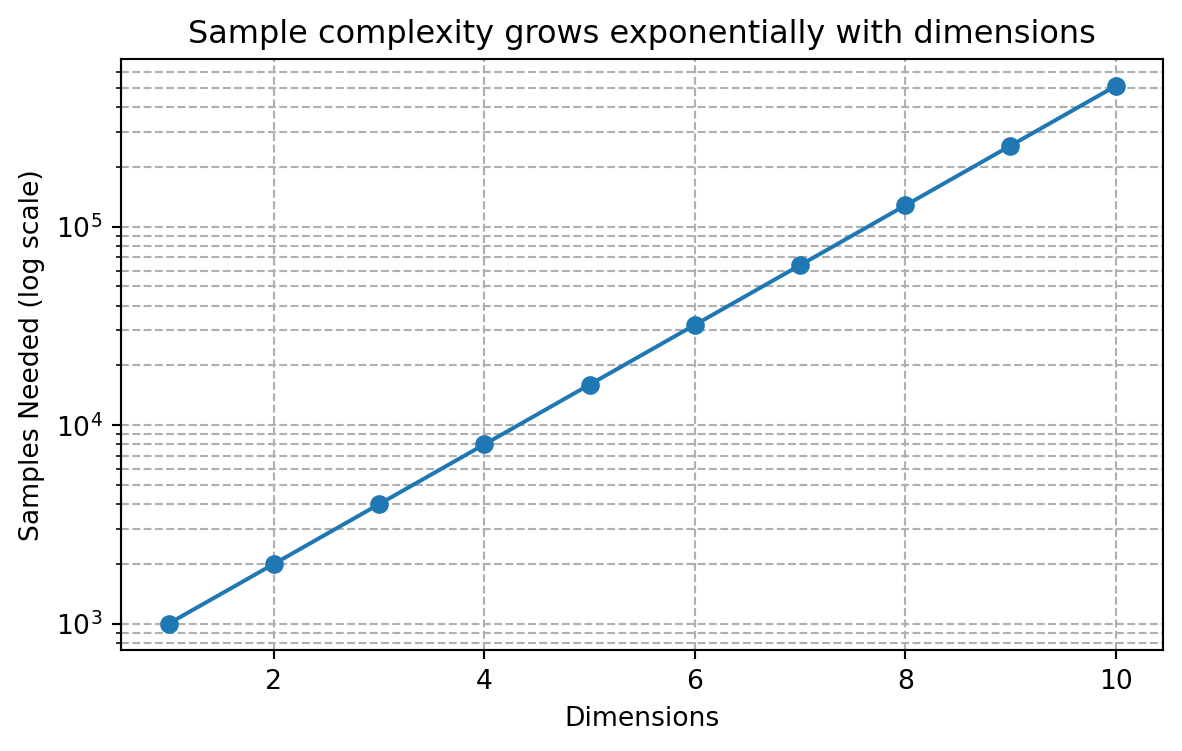

In [4]:
#| label: fig-curse-dimensionality
#| fig-cap: Sample complexity grows exponentially with dimensions
#| echo: false

# Python placeholder for exponential growth plot
import numpy as np
import matplotlib.pyplot as plt

dims = np.arange(1, 11)
samples_needed = 1000 * (2 ** (dims - 1))

plt.figure(figsize=(7, 4))
plt.plot(dims, samples_needed, marker='o')
plt.yscale('log')
plt.title('Sample complexity grows exponentially with dimensions')
plt.xlabel('Dimensions')
plt.ylabel('Samples Needed (log scale)')
plt.grid(True, which='both', ls='--')
plt.show()

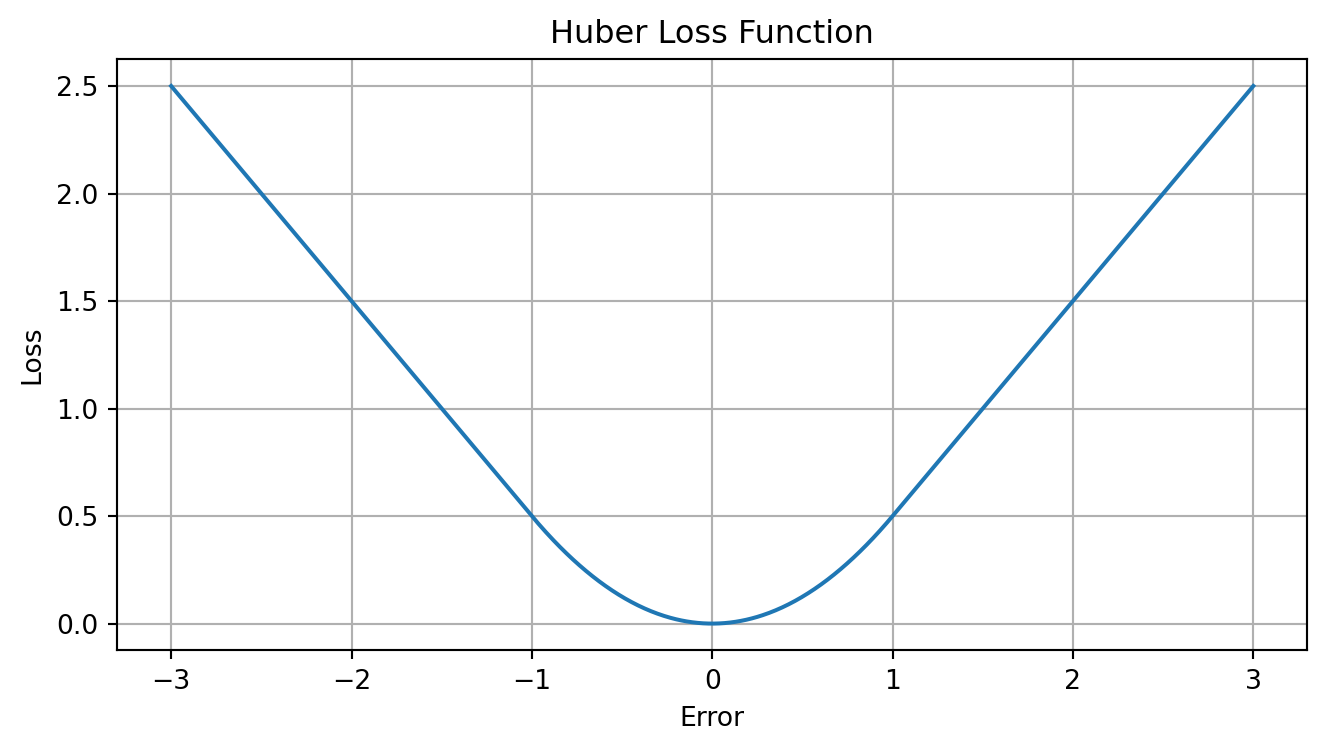

In [5]:
#| code-fold: show
#| label: fig-huber-loss
#| fig-cap: Visualization of Huber Loss function

import numpy as np
import matplotlib.pyplot as plt

# Example of how Huber loss works
def huber_loss(x, delta=1.0):
    if abs(x) <= delta:
        return 0.5 * x**2
    else:
        return delta * (abs(x) - 0.5 * delta)

x = np.linspace(-3, 3, 1000)
y = [huber_loss(val) for val in x]

plt.figure(figsize=(8, 4))
plt.plot(x, y)
plt.title("Huber Loss Function")
plt.xlabel("Error")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

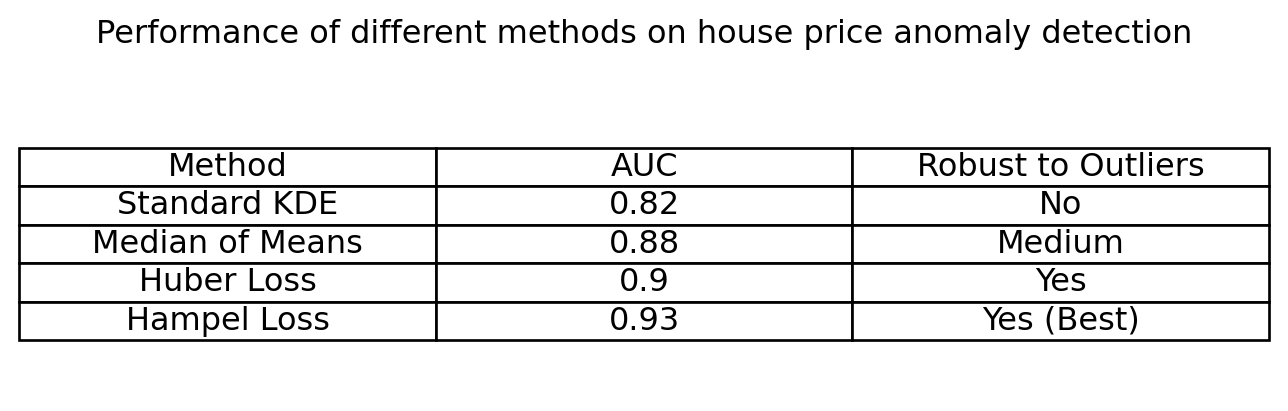

In [6]:
#| label: tbl-performance
#| tbl-cap: Performance of different methods on house price anomaly detection

# Python placeholder for performance comparison table
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Method': ['Standard KDE', 'Median of Means', 'Huber Loss', 'Hampel Loss'],
    'AUC': [0.82, 0.88, 0.90, 0.93],
    'Robust to Outliers': ['No', 'Medium', 'Yes', 'Yes (Best)']
}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(7, 2))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title('Performance of different methods on house price anomaly detection', pad=20)
plt.show()